In [1]:
import pandas as pd

df = pd.read_csv("../data/cleaned_data.csv")
df.tail()

,id,type_de_station,temperature_en_degre_c,pluie,humidite,pression,heure_de_paris,nom_station,date,time
395,2,ISS,3.8,0.0,88,100300,2025-11-26T09:00:00+00:00,marengo,2025-11-26,09:00:00
396,2,ISS,3.6,0.0,88,100300,2025-11-26T08:45:00+00:00,marengo,2025-11-26,08:45:00
397,2,ISS,3.5,0.0,88,100200,2025-11-26T08:30:00+00:00,marengo,2025-11-26,08:30:00
398,2,ISS,3.5,0.0,88,100200,2025-11-26T08:15:00+00:00,marengo,2025-11-26,08:15:00
399,2,ISS,3.4,0.0,88,100200,2025-11-26T08:00:00+00:00,marengo,2025-11-26,08:00:00


In [2]:
df.drop_duplicates(inplace=True)

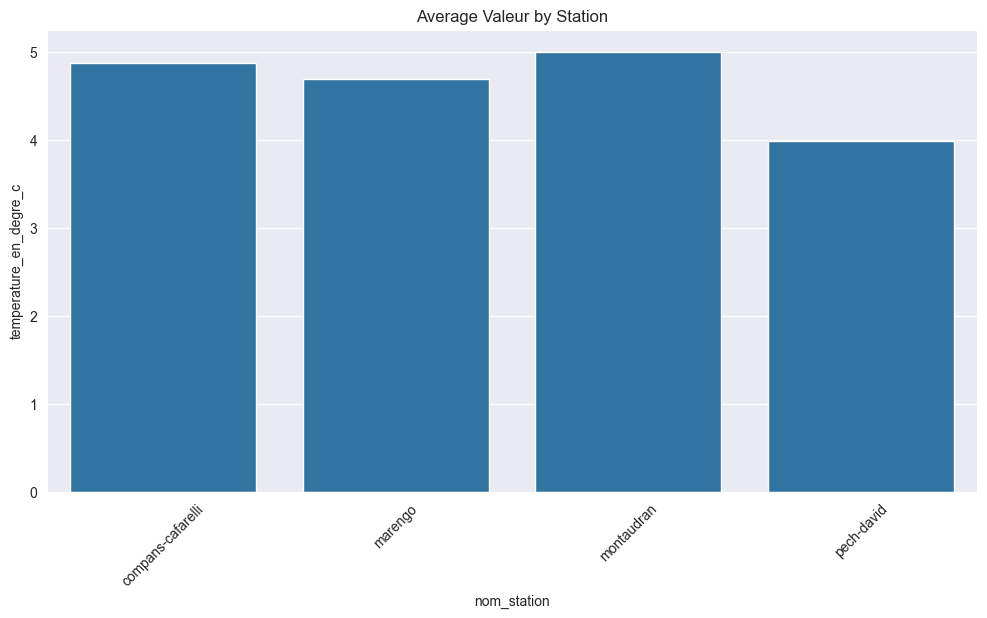

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

station_means = df.groupby('nom_station')['temperature_en_degre_c'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=station_means, x='nom_station', y='temperature_en_degre_c')
plt.title('Average Valeur by Station')
plt.xticks(rotation=45)
plt.show()

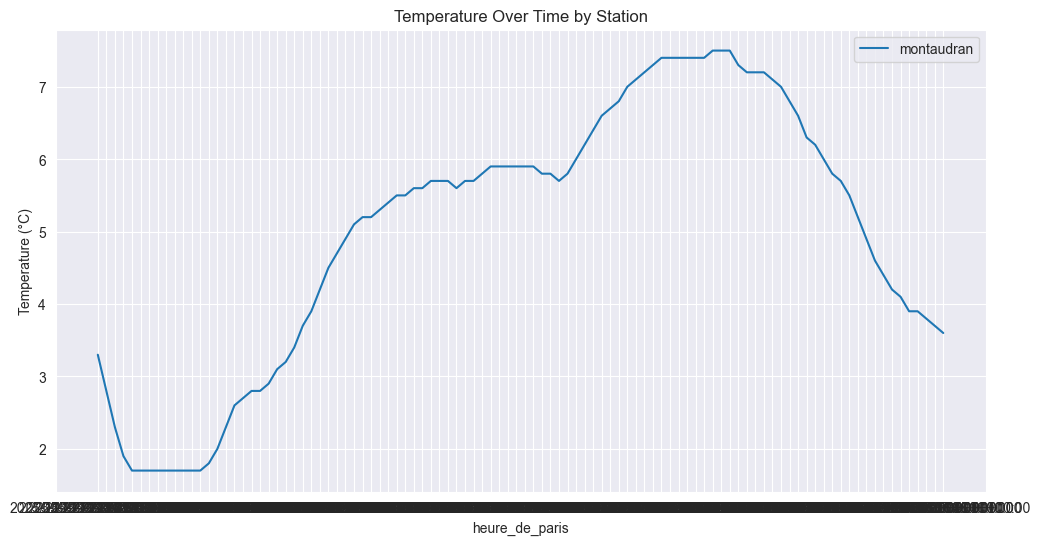

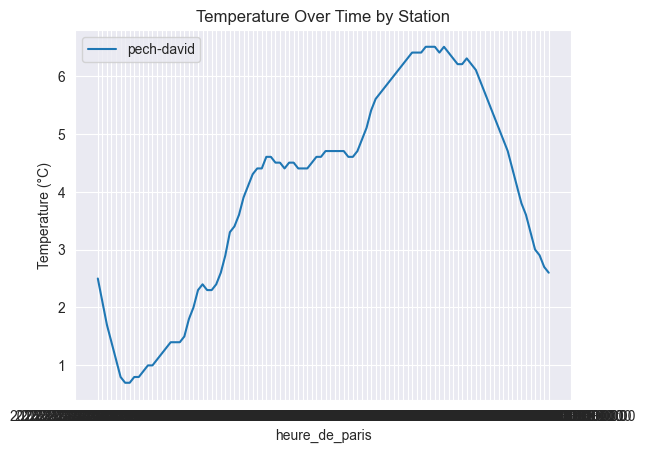

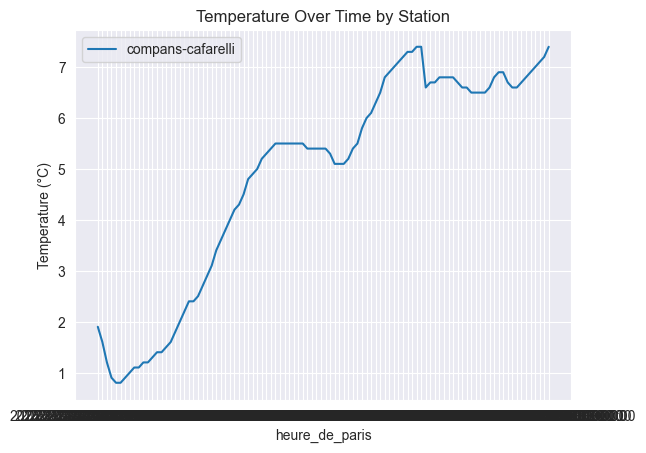

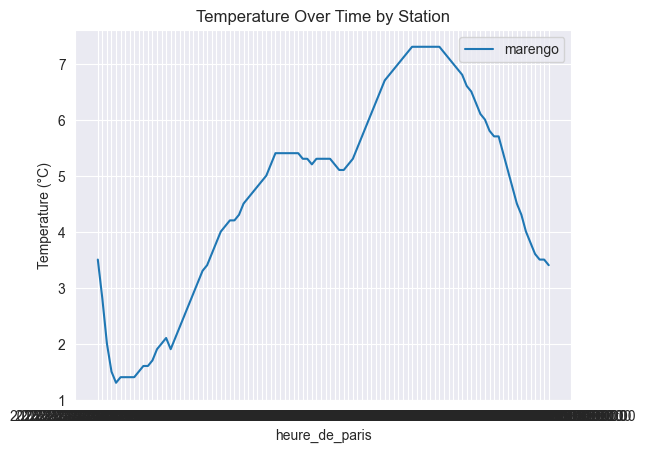

In [4]:
#faire une courbe des temperature en fonction du temps en utilisant la colonne 'date_heure' et 'temperature_en_degre_c' en fonction de la sttion 'nom_station'

df['date_heure'] = pd.to_datetime(df['heure_de_paris'])
plt.figure(figsize=(12,6))
for station in df['nom_station'].unique():
    station_data = df[df['nom_station'] == station]
    plt.plot(station_data['heure_de_paris'], station_data['temperature_en_degre_c'], label=station)
    plt.title('Temperature Over Time by Station')
    plt.xlabel('heure_de_paris')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()


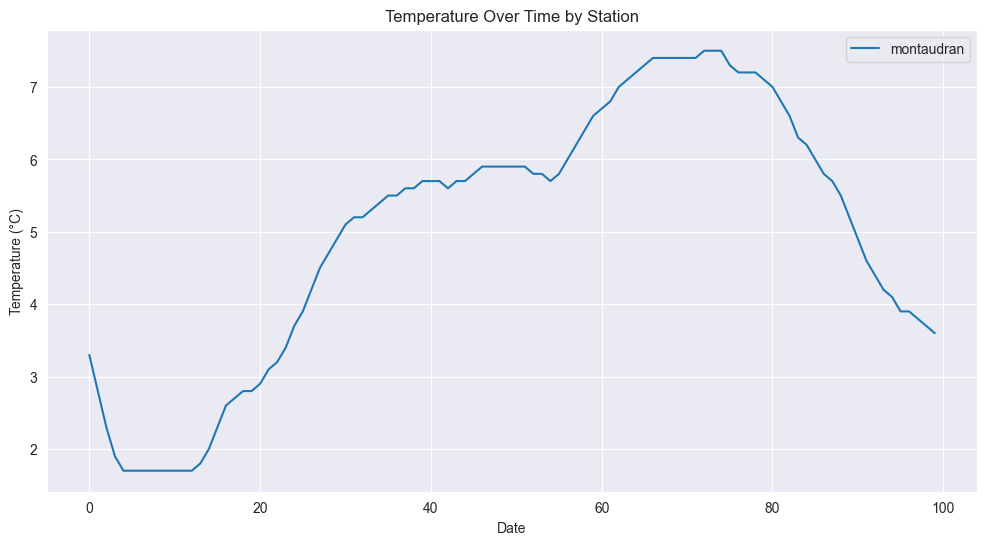

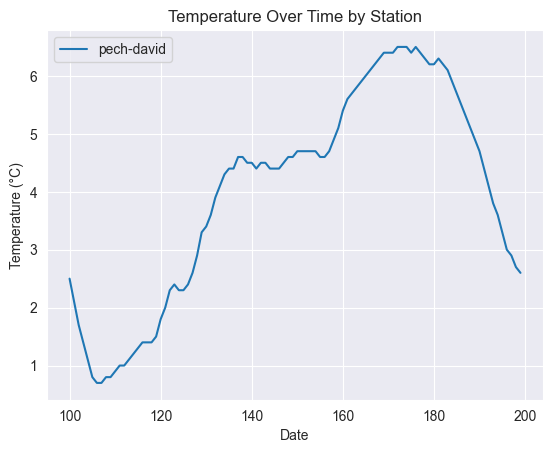

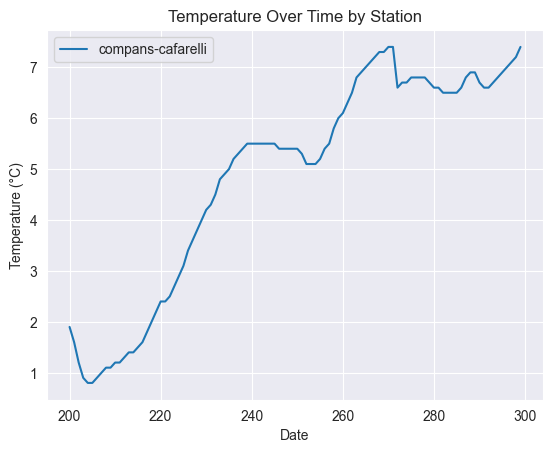

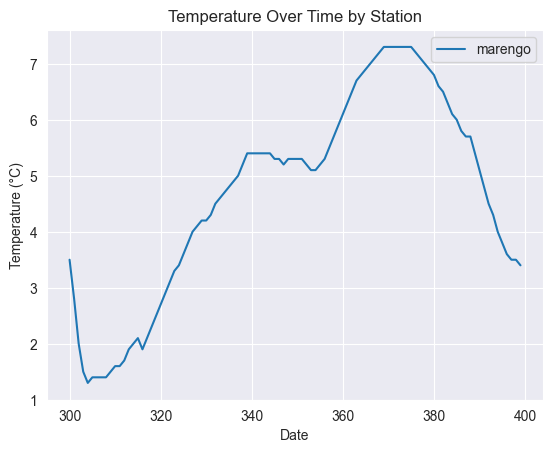

In [9]:
#faire une courbe des temperature en fonction du temps en utilisant la colonne 'date' et 'temperature_en_degre_c' en fonction de la station 'nom_station'
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12,6))
for station in df['nom_station'].unique():
    station_data = df[df['nom_station'] == station]
    plt.plot( station_data['temperature_en_degre_c'], label=station)
    plt.title('Temperature Over Time by Station')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

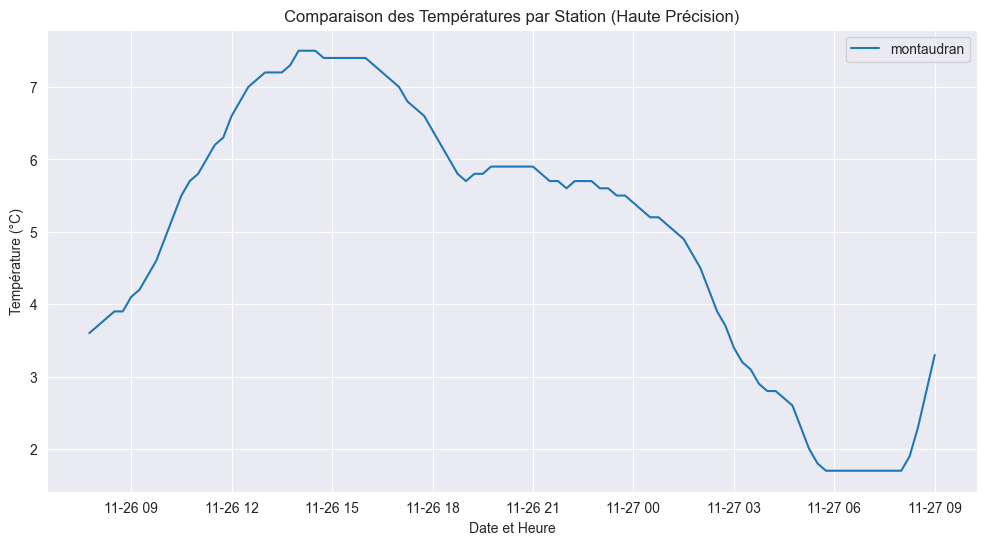

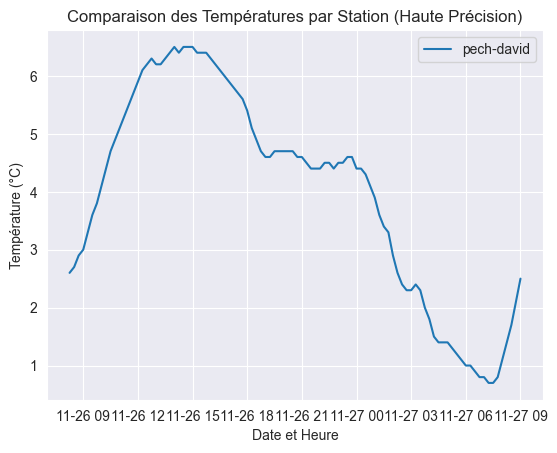

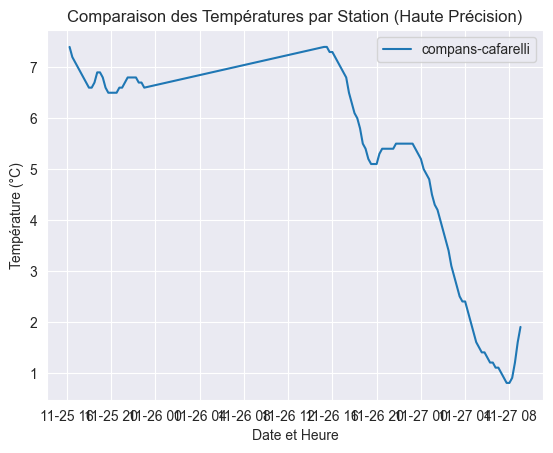

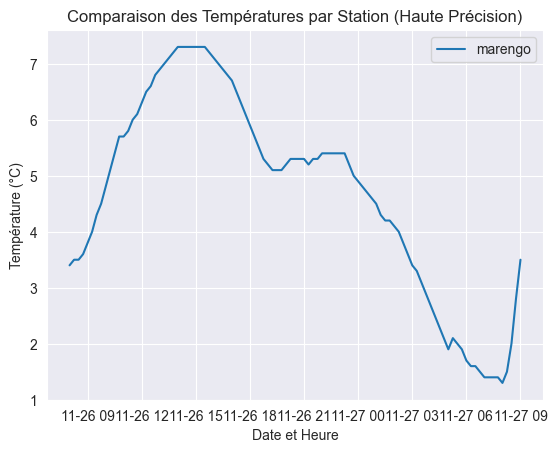

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. On initialise la figure UNE SEULE FOIS en dehors de la boucle
plt.figure(figsize=(12, 6))

# 3. La boucle pour tracer les lignes
for station in df['nom_station'].unique():
    station_data = df[df['nom_station'] == station]
    
    # On trace X=timestamp_complet et Y=temperature
    plt.plot(station_data['heure_de_paris'], 
             station_data['temperature_en_degre_c'], 
             label=station)

    # 4. On configure les titres et la légende UNE SEULE FOIS en dehors de la boucle
    plt.title('Comparaison des Températures par Station (Haute Précision)')
    plt.xlabel('Date et Heure')
    plt.ylabel('Température (°C)')
    plt.legend() # Affiche les noms des stations
    plt.grid(True)
    
    # 5. On affiche le tout
    plt.show()
    